<a href="https://colab.research.google.com/github/sachin-0502/CODSOFT/blob/main/CODSOFT_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train=pd.read_csv('/content/sales_advertising.csv')
train.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
train.sample(10)

,TV,Radio,Newspaper,Sales
5,8.7,48.9,75.0,7.2
48,227.2,15.8,49.9,19.8
162,188.4,18.1,25.6,19.9
94,107.4,14.0,10.9,11.5
105,137.9,46.4,59.0,15.0
42,293.6,27.7,1.8,20.7
72,26.8,33.0,19.3,8.8
1,44.5,39.3,45.1,10.4
164,117.2,14.7,5.4,11.9
58,210.8,49.6,37.7,23.8


In [ ]:
train.shape

(200, 4)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
train.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
train.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


###EDA

<ipython-input-130-8ec659d4a856>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['TV'])


<Axes: xlabel='TV', ylabel='Density'>

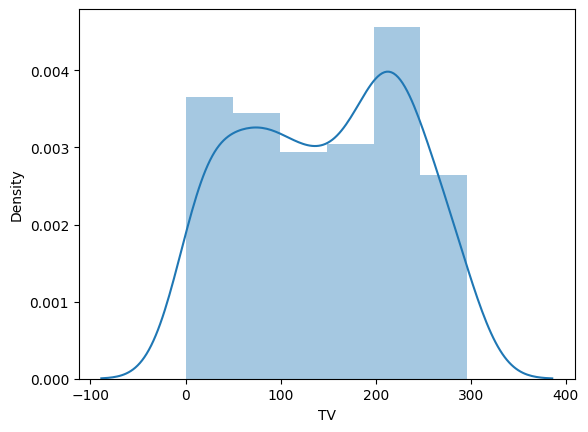

In [ ]:
sns.distplot(train['TV'])

<Axes: xlabel='TV', ylabel='Count'>

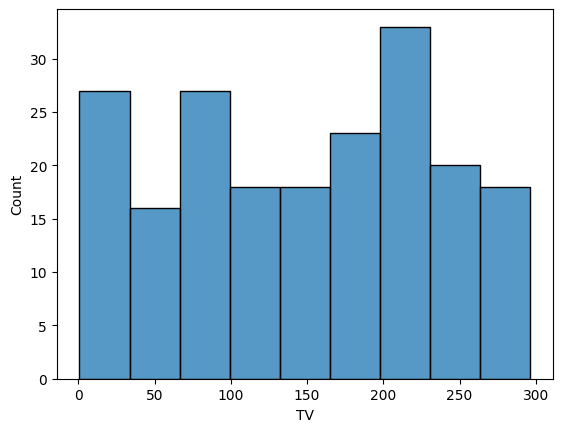

In [ ]:
sns.histplot(train['TV'])

<Axes: xlabel='TV', ylabel='Sales'>

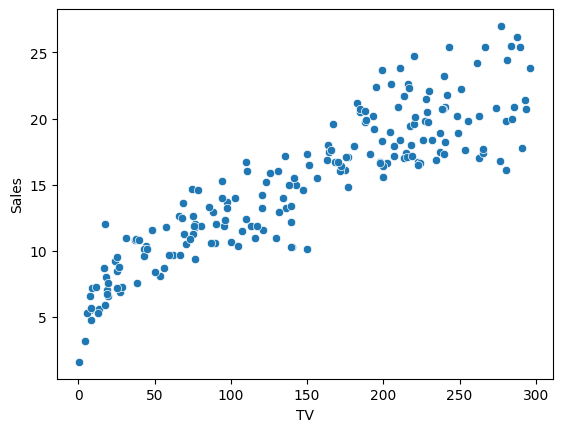

In [ ]:
sns.scatterplot(x="TV", y="Sales", data=train)

<Axes: xlabel='Radio', ylabel='Sales'>

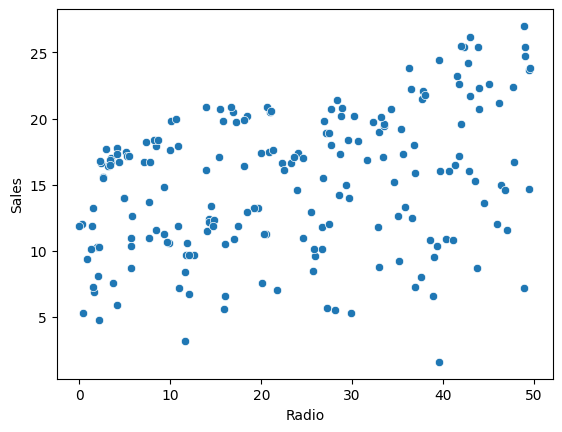

In [ ]:
sns.scatterplot(x="Radio", y="Sales", data=train)

<Axes: xlabel='Newspaper', ylabel='Sales'>

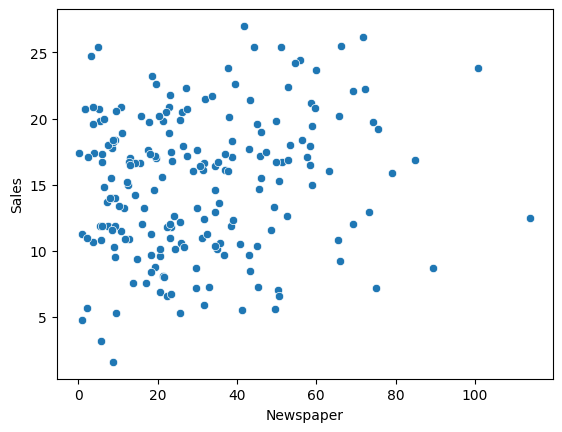

In [ ]:
sns.scatterplot(x="Newspaper", y="Sales", data=train)

In [ ]:
train['expenses']=train['Newspaper']+train['Radio']+1

<Axes: xlabel='expenses', ylabel='Sales'>

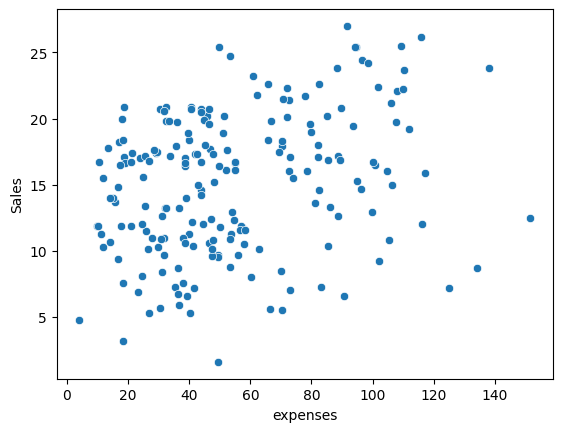

In [ ]:
sns.scatterplot(x="expenses", y="Sales", data=train)

<Axes: xlabel='total_expenses', ylabel='Sales'>

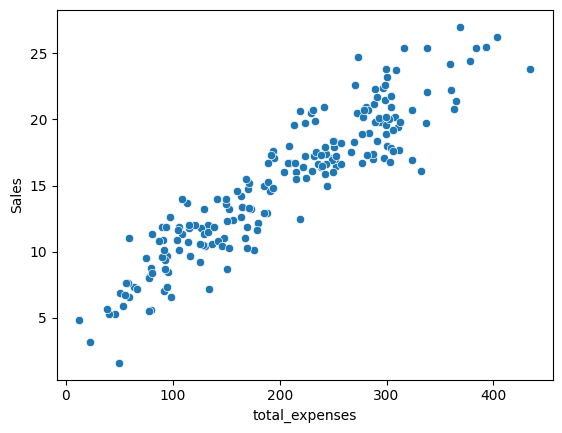

In [ ]:
train['total_expenses']=train['expenses']+train['TV']
sns.scatterplot(x="total_expenses", y="Sales", data=train)

In [ ]:
train.head()

,TV,Radio,Newspaper,Sales,expenses,total_expenses
0,230.1,37.8,69.2,22.1,108.0,338.1
1,44.5,39.3,45.1,10.4,85.4,129.9
2,17.2,45.9,69.3,12.0,116.2,133.4
3,151.5,41.3,58.5,16.5,100.8,252.3
4,180.8,10.8,58.4,17.9,70.2,251.0


In [ ]:
train.drop(['Radio','Newspaper','expenses','total_expenses'],axis=1,inplace=True)


In [ ]:
X=train['TV']
X.head

<bound method NDFrame.head of 0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64>

In [ ]:
Y=train['Sales']
Y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [ ]:
import statsmodels.api as sm



In [ ]:
X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(Y_train, X_train_sm).fit()

In [ ]:
lr.params

const    7.007108
TV       0.055483
dtype: float64

In [ ]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     689.1
Date:                Sat, 09 Sep 2023   Prob (F-statistic):           1.71e-59
Time:                        09:23:16   Log-Likelihood:                -355.76
No. Observations:                 160   AIC:                             715.5
Df Residuals:                     158   BIC:                             721.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0071      0.364     19.274      0.0

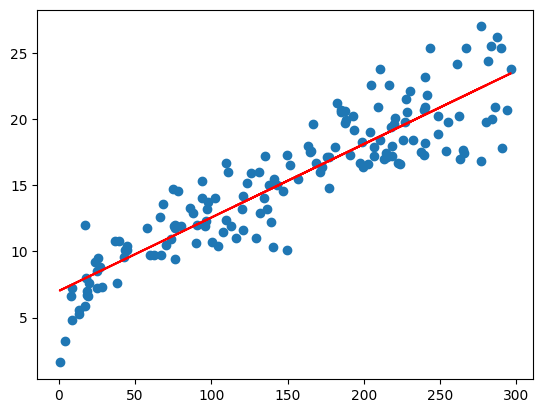

In [ ]:
plt.scatter(X_train, Y_train)
plt.plot(X_train, 7.0071 + 0.0555*X_train, 'r')
plt.show()

In [ ]:
Y_train_pred = lr.predict(X_train_sm)
res = (Y_train - Y_train_pred)

<ipython-input-149-92da65f621a5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


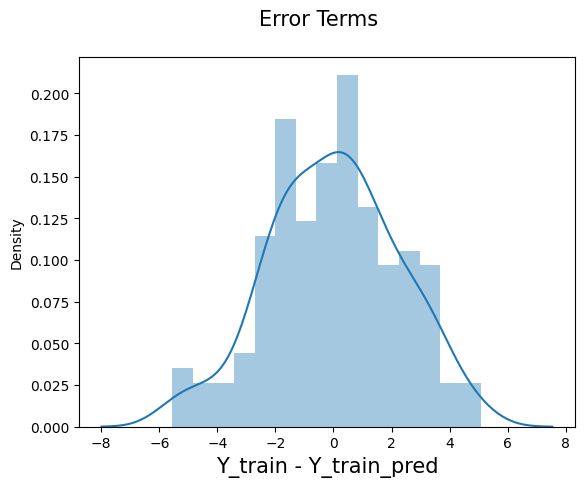

In [ ]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading
plt.xlabel('Y_train - Y_train_pred', fontsize = 15)         # X-label
plt.show()

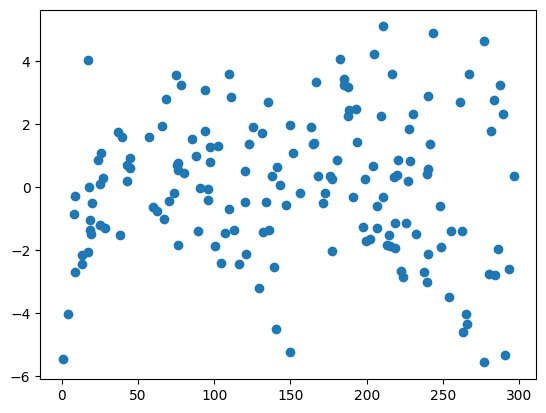

In [ ]:
plt.scatter(X_train,res)
plt.show()

In [ ]:
X_test_sm = sm.add_constant(X_test)
Y_pred = lr.predict(X_test_sm)


In [ ]:
Y_pred.head()

95     16.067473
15     17.848476
30     23.258063
158     7.656259
128    19.230001
dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
np.sqrt(mean_squared_error(Y_test, Y_pred))

2.470035001123256

In [ ]:
r_squared = r2_score(Y_test, Y_pred)
r_squared

0.802561303423698

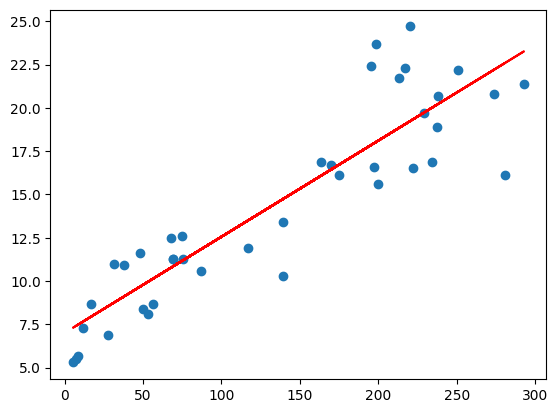

In [ ]:
plt.scatter(X_test, Y_test)
plt.plot(X_test,7.0071 + 0.0555*X_test, 'r')
plt.show()


In [ ]:
original_data=pd.read_csv('/content/sales_advertising.csv')

In [ ]:
Y_true=Y_test.values

In [ ]:
Y_true

array([16.9, 22.4, 21.4,  7.3, 24.7, 12.6, 22.3,  8.4, 16.5, 16.1, 11. ,
        8.7, 16.9,  5.3, 10.3, 16.7,  5.5, 16.6, 11.3, 18.9, 19.7, 12.5,
       10.9, 22.2, 11.3,  8.1, 21.7, 13.4, 10.6,  5.7, 15.6, 11.3, 23.7,
        8.7, 16.1, 20.7, 11.6, 20.8, 11.9,  6.9])

In [ ]:
check_sales=Y_pred.values

In [ ]:
check_sales

array([16.06747317, 17.84847567, 23.25806271,  7.65625887, 19.23000098,
       11.17387752, 19.03581067,  9.78125562, 19.34651516, 16.72217191,
        8.75482116, 10.12524988, 20.01785878,  7.30671633, 14.74697911,
       16.45030549,  7.41213392, 17.97053815, 11.18497411, 20.17875932,
       19.74044406, 10.76885203,  9.1154603 , 20.92777906, 10.83543156,
        9.97544593, 18.85271696, 14.73588252, 11.84522114,  7.47316516,
       18.09260063, 10.84652815, 18.04266598,  7.94477018, 22.58117079,
       20.22314567,  9.68693462, 22.19279018, 13.50970946,  8.53288939])

In [ ]:
final=pd.DataFrame()

In [ ]:
final['original_sales']=Y_true
final['predicted_sales']=check_sales

In [ ]:
final

,original_sales,predicted_sales
0,16.9,16.067473
1,22.4,17.848476
2,21.4,23.258063
3,7.3,7.656259
4,24.7,19.230001
5,12.6,11.173878
6,22.3,19.035811
7,8.4,9.781256
8,16.5,19.346515
9,16.1,16.722172


In [ ]:
final.to_csv('sales_prediction_submission.csv')